In [2]:
!python --version

Python 3.9.2


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv("2021_round_2_laptimes.csv")
df.head()

Unnamed: 0  lap          driver  position      time     secs
0           0    1  max_verstappen         1  1:38.603   98.603
1           1    1        hamilton         2  1:42.572  102.572
2           2    1         leclerc         3  1:47.198  107.198
3           3    1           perez         4  1:47.814  107.814
4           4    1       ricciardo         5  1:52.843  112.843

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# Overall Analysis

In [6]:
plt.figure(figsize=(17,5))
sns.boxplot(x='lap', y='secs', data=df)
plt.title('Lap-Times per Lap');
plt.savefig("img/1_laptimes_per_lap.png")

In [7]:
# replace outliers because of red flag
df['secs'].mask(df['secs'] > 250, df['secs'].median(), inplace=True)
df.describe()

lap     position         secs
count  1124.000000  1124.000000  1124.000000
mean     30.928826     9.465302    93.780387
std      18.081154     5.217244    20.023134
min       1.000000     1.000000    76.702000
25%      15.000000     5.000000    80.035250
50%      30.000000     9.000000    88.261500
75%      47.000000    14.000000    95.950750
max      63.000000    19.000000   190.646000

In [8]:
plt.figure(figsize=(17,5))
sns.boxplot(x='lap', y='secs', data=df)
plt.axhline(df['secs'].median(), ls='--', color='red', label='Overall Median')
plt.axhline(df['secs'].mean(), ls='-', color='blue', label='Overall Average')
plt.legend()
plt.ylim(75, 120)
plt.title('Lap-Times per Lap');
plt.savefig("img/2_laptimes_per_lap.png")

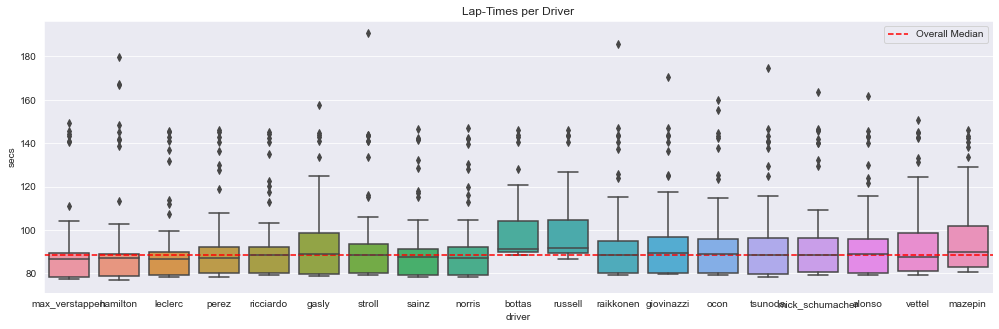

In [9]:
plt.figure(figsize=(17,5))
sns.boxplot(x='driver', y='secs', data=df)
plt.axhline(df['secs'].median(), ls='--', color='red', label='Overall Median')
plt.legend()
plt.title('Lap-Times per Driver');
plt.savefig("img/3_laptimes_per_driver.png")

In [10]:
df_piv = df.pivot("driver", "lap", "position")
# df_piv.fillna(20, inplace = True)
df_piv.head()

lap           1     2     3     4     5     6     7     8     9     10  ...  \
driver                                                                  ...   
alonso      17.0  16.0  16.0  15.0  15.0  15.0  15.0  15.0  15.0  17.0  ...   
bottas      10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  ...   
gasly        6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   8.0   8.0  ...   
giovinazzi  13.0  13.0  13.0  13.0  13.0  13.0  13.0  13.0  13.0  13.0  ...   
hamilton     2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  ...   

lap           54    55    56    57    58    59    60    61    62    63  
driver                                                                  
alonso      11.0  11.0  11.0  11.0  11.0  11.0  11.0  11.0  11.0  11.0  
bottas       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
gasly        8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0   8.0  
giovinazzi  15.0  15.0  15.0  15.0  15.0  15.0  15.0  15.0  14.0   NaN  
hamilton     4.0   3.0   3.0   3.0   3.0   3.0   2.0   2.0   2.0   2.0  

[5 rows x 63 columns]

In [11]:
f, ax = plt.subplots(figsize=(17, 6))
sns.heatmap(df_piv, linewidths=.1, ax=ax, cmap="Greens")
plt.title("Position Change per Lap for each Driver");
plt.savefig("img/4_positions_per_driver.png")

# Verstappen vs. Hamilton

In [15]:
df_ver = df[df['driver'] == 'max_verstappen'].copy()
df_ham = df[df['driver'] == 'hamilton'].copy()

In [32]:
plt.figure(figsize=(11, 4))

plt.subplot(1,2,1)
sns.boxplot(y='secs', data=df_ver, showfliers = False) # showfliers = False
plt.title("Max Verstappen Lap Times w/o Outliers")
plt.ylim(75, 105)

plt.subplot(1,2,2)
sns.boxplot(y='secs', data=df_ham, showfliers = False) # showfliers = False
plt.title("Lewis Hamilton Lap Times w/o Outliers")
plt.ylim(75, 105)

plt.draw()
plt.savefig("img/5_ver_ham_comparison.png")

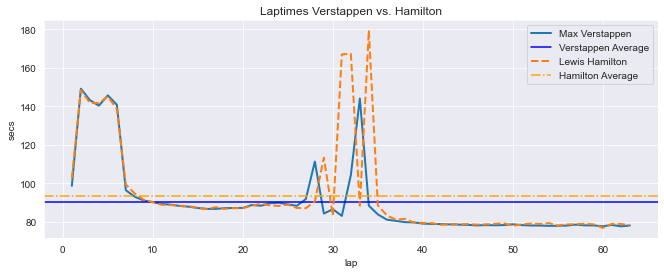

In [27]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='lap', y='secs', data=df_ver, label='Max Verstappen', ls='-', linewidth=2)
plt.axhline(df_ver['secs'].mean(), ls='-', color='blue', label='Verstappen Average')
sns.lineplot(x='lap', y='secs', data=df_ham, label='Lewis Hamilton', ls='--', linewidth=2)
plt.axhline(df_ham['secs'].mean(), ls='-.', color='orange', label='Hamilton Average')
plt.title('Laptimes Verstappen vs. Hamilton')
plt.legend();
plt.savefig("img/7_ver_ham_comparison.png")

# Haas - Mick Schumacher vs. Nikita Mazepin

In [12]:
df_mick = df[df['driver'] == 'mick_schumacher'].copy()
df_mazepin = df[df['driver'] == 'mazepin'].copy()

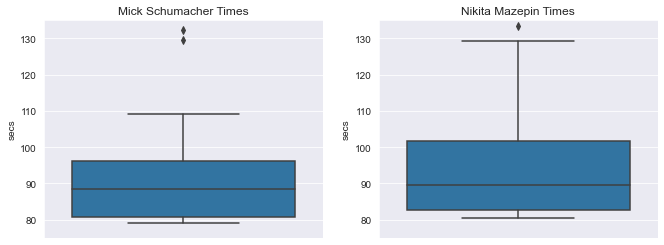

In [28]:
plt.figure(figsize=(11, 4))

plt.subplot(1,2,1)
sns.boxplot(y='secs', data=df_mick) # showfliers = False
plt.title("Mick Schumacher Times")
plt.ylim(75, 135)

plt.subplot(1,2,2)
sns.boxplot(y='secs', data=df_mazepin) # showfliers = False
plt.title("Nikita Mazepin Times")
plt.ylim(75, 135)

plt.draw()
plt.savefig("img/8_haas_comparison.png")

In [29]:
plt.figure(figsize=(11, 4))
sns.lineplot(x='lap', y='secs', data=df_mick, label='Mick Schumacher', ls='-')
plt.axhline(df_mick['secs'].mean(), ls='-', color='blue', label='Schumacher Average')
sns.lineplot(x='lap', y='secs', data=df_mazepin, label='Nikita Mazepin', ls='--')
plt.axhline(df_mazepin['secs'].mean(), ls='-.', color='orange', label='Mazepin Average')
plt.title('Laptimes Schumacher vs. Mazepin')
plt.legend();
plt.savefig("img/9_haas_comparison.png")